In [96]:
# including required libraries

import pandas as pd

In [97]:
dataset_url = 'https://web.stanford.edu/class/cs102/datasets/Titanic.csv'

In [98]:
titanic_df = pd.read_excel(dataset_url) # xls, xlsx

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [99]:
titanic_df = pd.read_table(dataset_url)

In [100]:
titanic_df

,"last,first,gender,age,class,fare,embarked,survived"
0,"Braund,Mr. Owen Harris,M,22,3,7.25,Southampton,no"
1,"Cumings,Mrs. John Bradley (Florence Briggs Tha..."
2,"Heikkinen,Miss Laina,F,26,3,7.925,Southampton,yes"
3,"Futrelle,Mrs. Jacques Heath (Lily May Peel),F,..."
4,"Allen,Mr. William Henry,M,35,3,8.05,Southampto..."
...,...
886,"Montvila,Rev. Juozas,M,27,2,13,Southampton,no"
887,"Graham,Miss Margaret Edith,F,19,1,30,Southampt..."
888,"Johnston,"" Miss Catherine Helen """"Carrie"""""",F,..."
889,"Behr,Mr. Karl Howell,M,26,1,30,Cherbourg,yes"


In [101]:
titanic_df.shape

(891, 1)

In [102]:
titanic_df = pd.read_csv(dataset_url)

In [104]:
titanic_df

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no
...,...,...,...,...,...,...,...,...
886,Montvila,Rev. Juozas,M,27.0,2,13.0000,Southampton,no
887,Graham,Miss Margaret Edith,F,19.0,1,30.0000,Southampton,yes
888,Johnston,"Miss Catherine Helen ""Carrie""",F,NaN,3,23.4500,Southampton,no
889,Behr,Mr. Karl Howell,M,26.0,1,30.0000,Cherbourg,yes


In [12]:
titanic_df.size

7128

In [13]:
titanic_df.shape

(891, 8)

In [16]:
titanic_df.isnull()

,last,first,gender,age,class,fare,embarked,survived
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [17]:
titanic_df.isnull().any()

last        False
first       False
gender      False
age          True
class       False
fare        False
embarked    False
survived    False
dtype: bool

In [18]:
titanic_df.isnull().any().any()

True

In [24]:
titanic_df.groupby(['gender', 'survived'])

In [25]:
titanic_df.groupby(['gender', 'survived']).count()

last  first  age  class  fare  embarked
gender survived                                         
F      no          81     81   64     81    81        81
       yes        233    233  197    233   233       233
M      no         468    468  360    468   468       468
       yes        109    109   93    109   109       109

In [28]:
titanic_df.groupby(['gender', 'survived']).count()['first']

gender  survived
F       no           81
        yes         233
M       no          468
        yes         109
Name: first, dtype: int64

In [29]:
titanic_df.groupby(['gender', 'survived'])['first'].count()

gender  survived
F       no           81
        yes         233
M       no          468
        yes         109
Name: first, dtype: int64

In [33]:
titanic_table = pd.pivot_table(data=titanic_df, values="last", index='gender', columns='survived', aggfunc='count')
titanic_table

survived,no,yes
gender,,
F,81,233
M,468,109


In [30]:
titanic_df['class'].value_counts()

3    491
1    216
2    184
Name: class, dtype: int64

In [50]:
titanic_table = pd.pivot_table(data=titanic_df, values="last", index='class', columns='survived', aggfunc='count')
titanic_table

survived,no,yes
class,,
1,80,136
2,97,87
3,372,119


In [31]:
print("Chance/probability of survival from class 1:: ", 136/(216))
print("Chance/probability of survival from class 2:: ", 87/(184))
print("Chance/probability of survival from class 3:: ", 119/(491))

Chance/probability of survival from class 1::  0.6296296296296297
Chance/probability of survival from class 2::  0.47282608695652173
Chance/probability of survival from class 3::  0.24236252545824846


In [37]:
titanic_df.value_counts()

last          first                      gender  age   class  fare      embarked     survived
Abbing        Mr. Anthony                M       42.0  3      7.5500    Southampton  no          1
Norman        Mr. Robert Douglas         M       28.0  2      13.5000   Southampton  no          1
Najib          Miss Adele Kiamie "Jane"  F       15.0  3      7.2250    Cherbourg    yes         1
Nakid          Miss Maria ("Mary")       F       1.0   3      15.7417   Cherbourg    yes         1
              Mr. Sahid                  M       20.0  3      15.7417   Cherbourg    yes         1
                                                                                                ..
Fox           Mr. Stanley Hubert         M       36.0  2      13.0000   Southampton  no          1
Francatelli   Miss Laura Mabel           F       30.0  1      56.9292   Cherbourg    yes         1
Frauenthal    Dr. Henry William          M       50.0  1      133.6500  Southampton  yes         1
Frolicher     M

<AxesSubplot:xlabel='gender'>

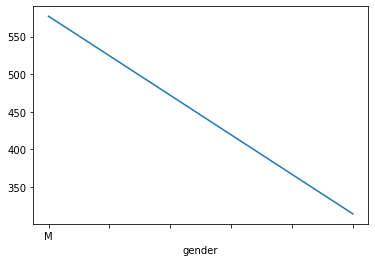

In [36]:
titanic_df.value_counts('gender').plot()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

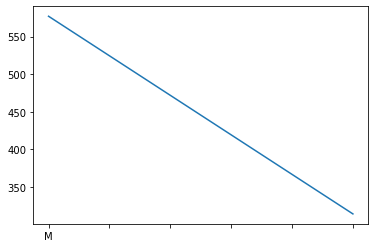

In [54]:
titanic_df['gender'].value_counts().plot().bar()

In [41]:
titanic_df['gender']

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: gender, Length: 891, dtype: object

In [42]:
titanic_df['gender'].value_counts()

M    577
F    314
Name: gender, dtype: int64

In [45]:
titanic_df['gender'].value_counts().plot

<AxesSubplot:>

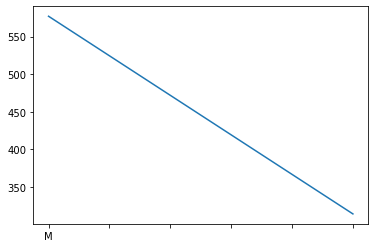

In [46]:
titanic_df['gender'].value_counts().plot()

In [47]:
titanic_df['gender'].value_counts().plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x0000023E9E2B77C0>>

<AxesSubplot:>

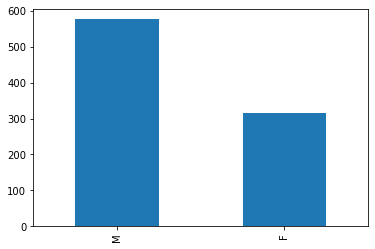

In [48]:
titanic_df['gender'].value_counts().plot.bar()

In [49]:
titanic_df['survived']=='yes'

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

In [50]:
titanic_df[titanic_df['survived']=='yes']

,last,first,gender,age,class,fare,embarked,survived
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
8,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),F,27.0,3,11.1333,Southampton,yes
9,Nasser,Mrs. Nicholas (Adele Achem),F,14.0,2,30.0708,Cherbourg,yes
...,...,...,...,...,...,...,...,...
875,Najib,"Miss Adele Kiamie ""Jane""",F,15.0,3,7.2250,Cherbourg,yes
879,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson),F,56.0,1,83.1583,Cherbourg,yes
880,Shelley,Mrs. William (Imanita Parrish Hall),F,25.0,2,26.0000,Southampton,yes
887,Graham,Miss Margaret Edith,F,19.0,1,30.0000,Southampton,yes


In [60]:
titanic_df['gender']=='M'

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: gender, Length: 891, dtype: bool

In [51]:
# Retrieve records for all people, who survived, i.e. survived = yes 

titanic_df.query("survived == 'yes'")

,last,first,gender,age,class,fare,embarked,survived
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
8,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),F,27.0,3,11.1333,Southampton,yes
9,Nasser,Mrs. Nicholas (Adele Achem),F,14.0,2,30.0708,Cherbourg,yes
...,...,...,...,...,...,...,...,...
875,Najib,"Miss Adele Kiamie ""Jane""",F,15.0,3,7.2250,Cherbourg,yes
879,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson),F,56.0,1,83.1583,Cherbourg,yes
880,Shelley,Mrs. William (Imanita Parrish Hall),F,25.0,2,26.0000,Southampton,yes
887,Graham,Miss Margaret Edith,F,19.0,1,30.0000,Southampton,yes


In [52]:
# Select * from table, where gender = male and survived = yes

titanic_df.query("gender == 'M' and survived == 'yes'") 


,last,first,gender,age,class,fare,embarked,survived
17,Williams,Mr. Charles Eugene,M,NaN,2,13.0000,Southampton,yes
21,Beesley,Mr. Lawrence,M,34.0,2,13.0000,Southampton,yes
23,Sloper,Mr. William Thompson,M,28.0,1,35.5000,Southampton,yes
36,Mamee,Mr. Hanna,M,NaN,3,7.2292,Cherbourg,yes
55,Woolner,Mr. Hugh,M,NaN,1,35.5000,Southampton,yes
...,...,...,...,...,...,...,...,...
838,Chip,Mr. Chang,M,32.0,3,56.4958,Southampton,yes
839,Marechal,Mr. Pierre,M,NaN,1,29.7000,Cherbourg,yes
857,Daly,Mr. Peter Denis,M,51.0,1,26.5500,Southampton,yes
869,Johnson,Master Harold Theodor,M,4.0,3,11.1333,Southampton,yes


In [70]:
titanic_df.query("(gender=='M') & (survived=='yes')") 

,last,first,gender,age,class,fare,embarked,survived
17,Williams,Mr. Charles Eugene,M,NaN,2,13.0000,Southampton,yes
21,Beesley,Mr. Lawrence,M,34.0,2,13.0000,Southampton,yes
23,Sloper,Mr. William Thompson,M,28.0,1,35.5000,Southampton,yes
36,Mamee,Mr. Hanna,M,NaN,3,7.2292,Cherbourg,yes
55,Woolner,Mr. Hugh,M,NaN,1,35.5000,Southampton,yes
...,...,...,...,...,...,...,...,...
838,Chip,Mr. Chang,M,32.0,3,56.4958,Southampton,yes
839,Marechal,Mr. Pierre,M,NaN,1,29.7000,Cherbourg,yes
857,Daly,Mr. Peter Denis,M,51.0,1,26.5500,Southampton,yes
869,Johnson,Master Harold Theodor,M,4.0,3,11.1333,Southampton,yes


In [79]:
titanic_df.query("gender == 'M' and class == '1'")

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [80]:
titanic_df.query("gender == 'M' && class == '1'")

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [81]:
titanic_df.query("gender == '"+'M'+"' and class == '" +'1'+"'")

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [91]:
titanic_df.rename(columns = {'class':'passenger_class'}, inplace = True)
titanic_df.head(2)

,last,first,gender,age,passenger_class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes




Conditional probability:
\begin{equation*}
 P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation*}


Our Scenario:
\begin{equation*}
P(Survival| Gender = X \cap Class = Y) = \frac{P (Survive \cap G=X \cap C=Y) }{P (G=X \cap C=Y)}
\end{equation*}

In [70]:
# Condition Probability of an event A, given events B and C can be calculated by below formula:
# P(A|B∩C)=P(A∩B∩C)/P(B∩C)
# Calculating this conditional probability for all combinations (Sex=M/F and Pclass=1/2/3)
# P(Survival = yes | Sex, Pclass) = P(Survival=yes,sex='m/f',pclass='1/2/3') / P(sex='m/f',pclass='1/2/3')
# P(Survival = yes, given sex=male and pclass=1) = P(Survival = yes, sex=male, pclass=1) / P(sex=male, pclass=1) 
# Similarly, for all combinations.

titanic_df.query('passenger_class==1 & gender=="F"')

#P_male_class_1 = titanic_df.query('passenger_class==1 & gender=="M"').shape[0]/length_titanic_df

,last,first,gender,age,passenger_class,fare,embarked,survived
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
11,Bonnell,Miss Elizabeth,F,58.0,1,26.5500,Southampton,yes
31,Spencer,Mrs. William Augustus (Marie Eugenie),F,NaN,1,146.5208,Cherbourg,yes
52,Harper,Mrs. Henry Sleeper (Myna Haxtun),F,49.0,1,76.7292,Cherbourg,yes
...,...,...,...,...,...,...,...,...
856,Wick,Mrs. George Dennick (Mary Hitchcock),F,45.0,1,164.8667,Southampton,yes
862,Swift,Mrs. Frederick Joel (Margaret Welles Barron),F,48.0,1,25.9292,Southampton,yes
871,Beckwith,Mrs. Richard Leonard (Sallie Monypeny),F,47.0,1,52.5542,Southampton,yes
879,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson),F,56.0,1,83.1583,Cherbourg,yes


In [71]:
titanic_df.query('passenger_class==1 & gender=="F" & survived=="yes"')
#P_survived_male_class_1 = titanic_df.query('passenger_class==1 & gender=="M" & survived=="yes"').shape[0]/length_titanic_df

#print(P_survived_male_class_1/P_male_class_1)

,last,first,gender,age,passenger_class,fare,embarked,survived
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
11,Bonnell,Miss Elizabeth,F,58.0,1,26.5500,Southampton,yes
31,Spencer,Mrs. William Augustus (Marie Eugenie),F,NaN,1,146.5208,Cherbourg,yes
52,Harper,Mrs. Henry Sleeper (Myna Haxtun),F,49.0,1,76.7292,Cherbourg,yes
...,...,...,...,...,...,...,...,...
856,Wick,Mrs. George Dennick (Mary Hitchcock),F,45.0,1,164.8667,Southampton,yes
862,Swift,Mrs. Frederick Joel (Margaret Welles Barron),F,48.0,1,25.9292,Southampton,yes
871,Beckwith,Mrs. Richard Leonard (Sallie Monypeny),F,47.0,1,52.5542,Southampton,yes
879,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson),F,56.0,1,83.1583,Cherbourg,yes


In [73]:
length_titanic_df = titanic_df.shape[0]

P_male_class_1 = titanic_df.query('passenger_class==1 & gender=="M"').shape[0]/length_titanic_df
P_male_class_2 = titanic_df.query('passenger_class==2 & gender=="M"').shape[0]/length_titanic_df
P_male_class_3 = titanic_df.query('passenger_class==3 & gender=="M"').shape[0]/length_titanic_df
P_female_class_1 = titanic_df.query('passenger_class==1 & gender=="F"').shape[0]/length_titanic_df
P_female_class_2 = titanic_df.query('passenger_class==2 & gender=="F"').shape[0]/length_titanic_df
P_female_class_3 = titanic_df.query('passenger_class==3 & gender=="F"').shape[0]/length_titanic_df

P_survived_male_class_1 = titanic_df.query('passenger_class==1 & gender=="M" & survived=="yes"').shape[0]/length_titanic_df
P_survived_male_class_2 = titanic_df.query('passenger_class==2 & gender=="M" & survived=="yes"').shape[0]/length_titanic_df
P_survived_male_class_3 = titanic_df.query('passenger_class==3 & gender=="M" & survived=="yes"').shape[0]/length_titanic_df
P_survived_female_class_1 = titanic_df.query('passenger_class==1 & gender=="F" & survived=="yes"').shape[0]/length_titanic_df
P_survived_female_class_2 = titanic_df.query('passenger_class==2 & gender=="F" & survived=="yes"').shape[0]/length_titanic_df
P_survived_female_class_3 = titanic_df.query('passenger_class==3 & gender=="F" & survived=="yes"').shape[0]/length_titanic_df

P_survival_yes_male_class_1 = round(P_survived_male_class_1 / P_male_class_1, 2)
P_survival_yes_male_class_2 = round(P_survived_male_class_2 / P_male_class_2, 2)
P_survival_yes_male_class_3 = round(P_survived_male_class_3 / P_male_class_3, 2) 
P_survival_yes_female_class_1 = round(P_survived_female_class_1 / P_female_class_1, 2)
P_survival_yes_female_class_2 = round(P_survived_female_class_2 / P_female_class_2, 2)
P_survival_yes_female_class_3 = round(P_survived_female_class_3 / P_female_class_3, 2)

print("Conditional Probability of survival, if gender=male & class=1:",P_survival_yes_male_class_1)
print("Conditional Probability of survival, if gender=male & class=2:",P_survival_yes_male_class_2)
print("Conditional Probability of survival, if gender=male & class=3:",P_survival_yes_male_class_3,"\n")

print("Conditional Probability of survival, if gender=female & class=1:",P_survival_yes_female_class_1)
print("Conditional Probability of survival, if gender=female & class=2:",P_survival_yes_female_class_2)
print("Conditional Probability of survival, if gender=female & class=3:",P_survival_yes_female_class_3)

Conditional Probability of survival, if gender=male & class=1: 0.37
Conditional Probability of survival, if gender=male & class=2: 0.16
Conditional Probability of survival, if gender=male & class=3: 0.14 

Conditional Probability of survival, if gender=female & class=1: 0.97
Conditional Probability of survival, if gender=female & class=2: 0.92
Conditional Probability of survival, if gender=female & class=3: 0.5


In [ ]:
# The ascending order of conditional probability of survival (given gender and class) is

# male from class 3
# male from class 2
# male from class 1
# female from class 3
# female from class 2
# female from class 1

In [ ]:
# The descending order of conditional probability of survival (given gender and class) is

# female from class 1
# female from class 2
# female from class 3
# male from class 1
# male from class 2
# male from class 3